# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a type of data analysis aimed at identifying patterns and relationships within a dataset while also formulating hypotheses. It typically serves as the initial step in working with data, allowing data analysts to gain insights and a better understanding of the information at hand. As a result of EDA, essential data preprocessing operations are defined to prepare the dataset for further analysis and applications.

The following example is conducted on the titanic dataset, commonly used to learn Machine Learning skills.

Datasource:  
*Will Cukierski. (2012). Titanic - Machine Learning from Disaster. Kaggle. https://kaggle.com/competitions/titanic*

# <img src="../../assets/titanic1.png" width="800"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preliminary Data Analysis

In the preliminary data analysis, our goal is to obtain a general understanding of the dataset. 
There are 12 columns in the dataset:

- **Survived**: 1 for survived and 0 for perished
- **PassengerId**: Unique Id of a passenger
- **Pclass**: Ticket class
- **Name**: Passenger name
- **Sex**: Sex
- **Age**: age in years
- **SibSp**: # of siblings / spouses aboard Titanic
- **Parch**: # of parents / children aboard Titanic
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Embarked**: Port of embarkation (S - Southampton, C- Cherbourg, Q- Queenstown)

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
categorical_cols = list(titanic.select_dtypes(include=['object', 'category']).columns)
numerical_cols = list(titanic.select_dtypes(include=['number']).columns)

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [5]:
# Show a summary of numeric features in the dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


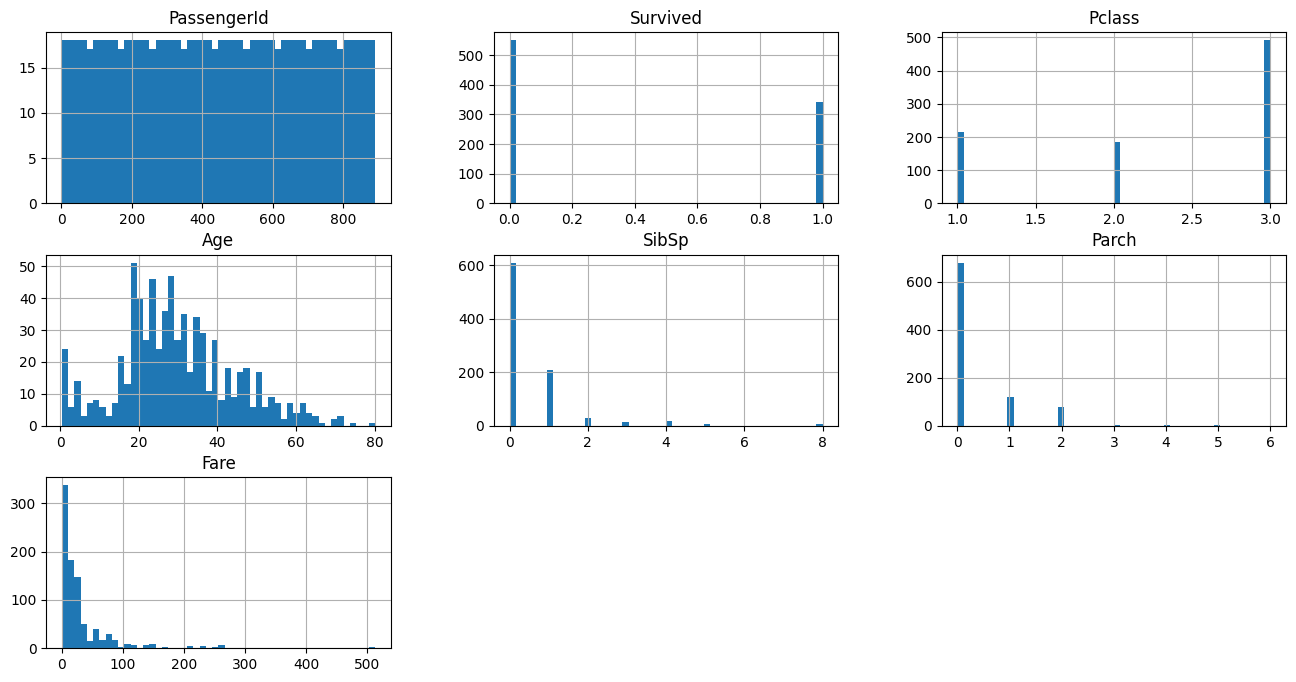

In [6]:
titanic.hist(bins=50, figsize=(16,8))
plt.show()

### Numerical data validation

In this step, our objective is to verify numeric features

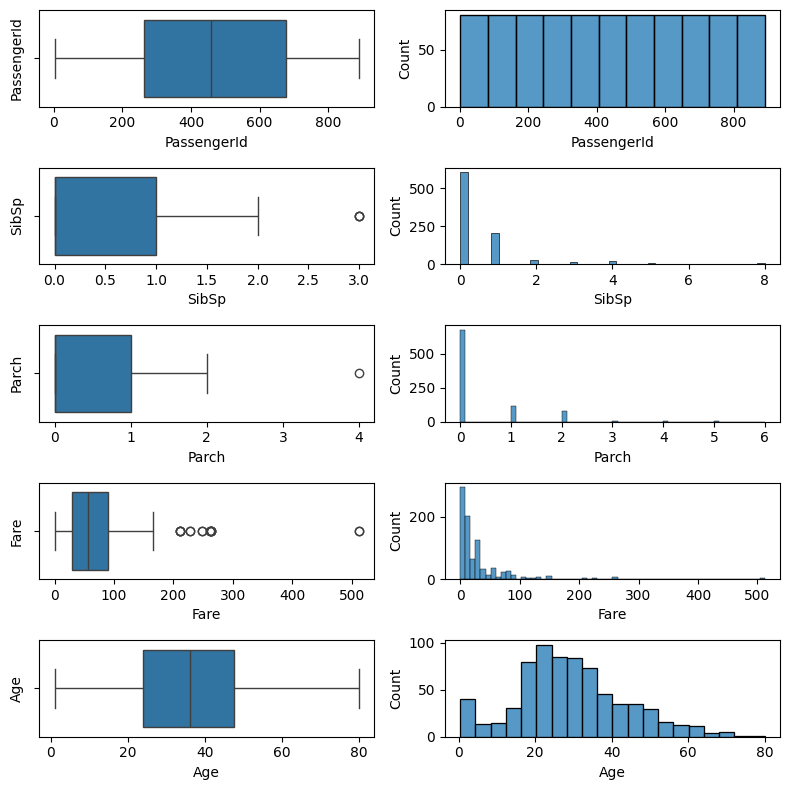

In [7]:
numeric_cols = ['PassengerId', 'SibSp', 'Parch', 'Fare', 'Age']

# Define the number of rows and columns for the grid of plots
num_rows = len(numeric_cols)
num_cols = 2

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 8))

# Iterate through the columns and create boxplots and histograms
for i, column in enumerate(numeric_cols):
    # Boxplot
    sns.boxplot(data=titanic.dropna(), x=column, ax=axes[i, 0])
    axes[i, 0].set_ylabel(column)
    
    # Histogram
    sns.histplot(data=titanic, x=column, ax=axes[i, 1], kde=False)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

### Categorical data validation

In [8]:
cat_columns = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
titanic_cat = titanic[cat_columns]

In [9]:
print(titanic_cat.nunique().sort_values())

Survived      2
Sex           2
Pclass        3
Embarked      3
Cabin       147
Ticket      681
Name        891
dtype: int64


In [10]:
print(titanic_cat.isna().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64


Number of survivors (38.38%): 342
Number of victims (61.62%): 549


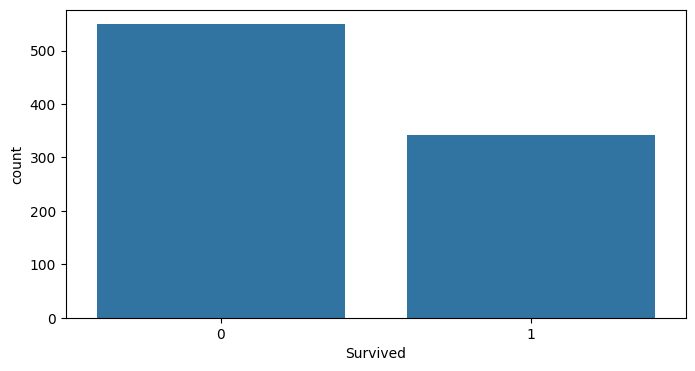

In [11]:
# plot number of survivors and victims
survived_no = titanic['Survived'].sum()
total_pax = titanic['Survived'].count()
survived_pct = 100 * survived_no / total_pax
print(f"Number of survivors ({survived_pct:.2f}%): {survived_no}")
print(f"Number of victims ({100 - survived_pct:.2f}%): {total_pax - survived_no}")

plt.figure(figsize=(8,4))
sns.countplot(titanic, x='Survived')
plt.show()

### Survival rate analysis

In [12]:
# Analysis for number of survivors
result = titanic.groupby('Sex')['Survived'].agg(
    survivors='sum',
    total='count',
    ratio=lambda x: round((x.sum() / x.count()),2))

print(result)

        survivors  total  ratio
Sex                            
female        233    314   0.74
male          109    577   0.19


In [13]:
# Analysis for number of survivors
result = titanic.groupby('Embarked')['Survived'].agg(
    survivors='sum',
    total='count',
    ratio=lambda x: round((x.sum() / x.count()),2))

print(result)

          survivors  total  ratio
Embarked                         
C                93    168   0.55
Q                30     77   0.39
S               217    644   0.34


In [14]:
# Analysis for number of survivors
result = titanic.groupby('Pclass')['Survived'].agg(
    survivors='sum',
    total='count',
    ratio=lambda x: round((x.sum() / x.count()),2))

print(result)

        survivors  total  ratio
Pclass                         
1             136    216   0.63
2              87    184   0.47
3             119    491   0.24


## Pattern recognition

In this chapter, we will analyze features and targets together to find any relations within the dataset. It is a good idea to see if there is any correlation between object-typed columns as well. That is why I will convert them to numeric values or, even better, I will use `pd.get_dummies` option.

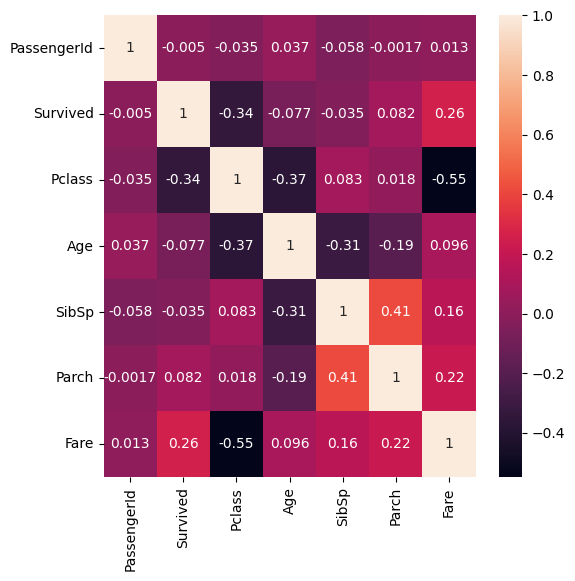

In [15]:
# correlation matrix first
correlation_matrix = titanic.select_dtypes(include=['number']).corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

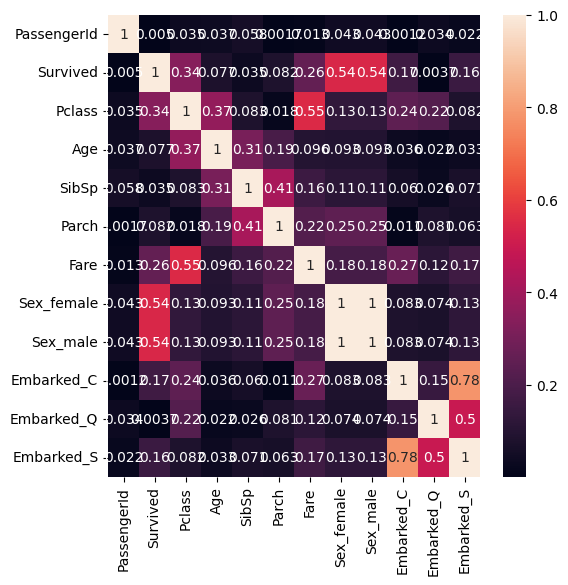

In [16]:
# Get additional columns of data
titanic_dummies = pd.get_dummies(titanic, columns=['Sex', 'Embarked'])

# Calculate standard correlation coefficient
plt.figure(figsize=(6, 6))
corr_matrix = titanic_dummies.corr(numeric_only=True).abs()
sns.heatmap(corr_matrix, annot=True)
plt.show()

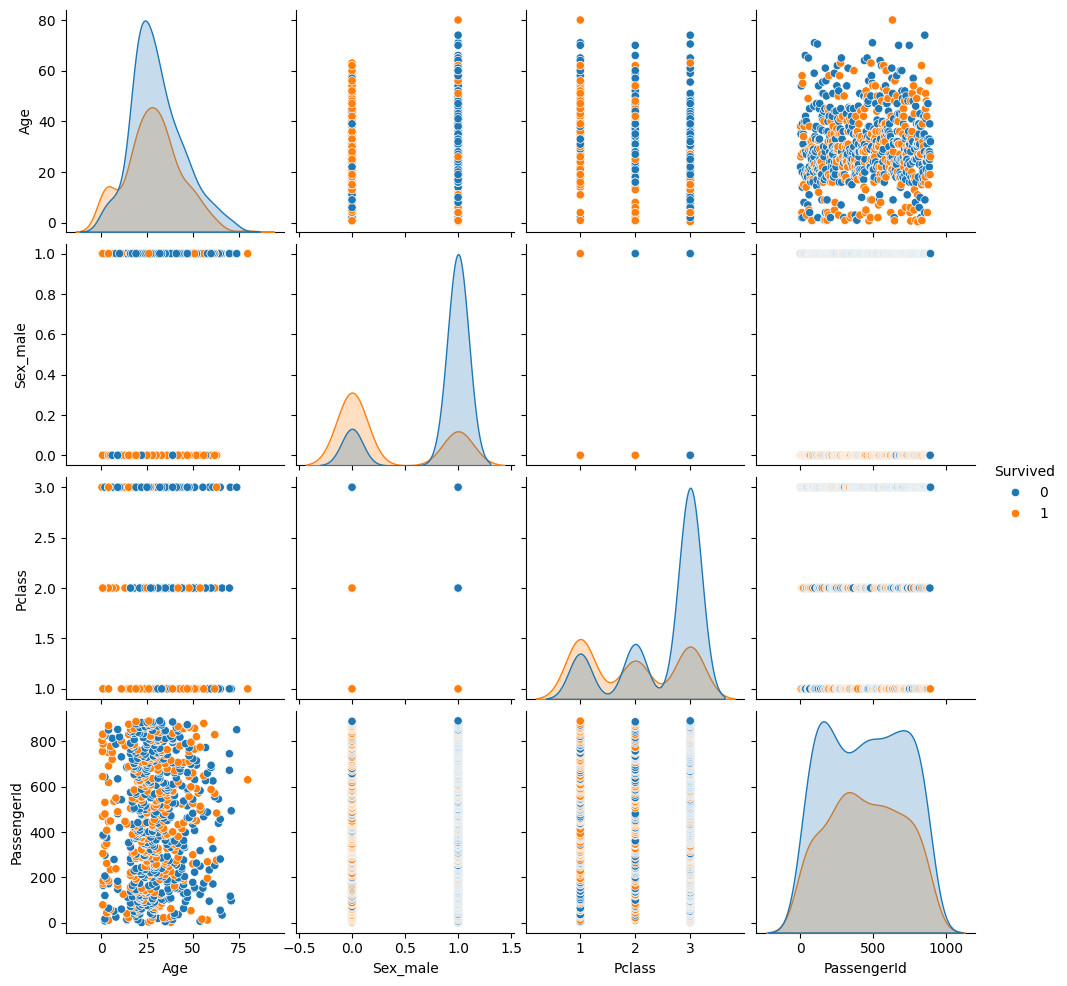

In [17]:
pair_columns = ['Survived', 'Age', 'Sex_male', 'Pclass', 'PassengerId']

sns.pairplot(titanic_dummies[pair_columns], hue='Survived')
plt.show()

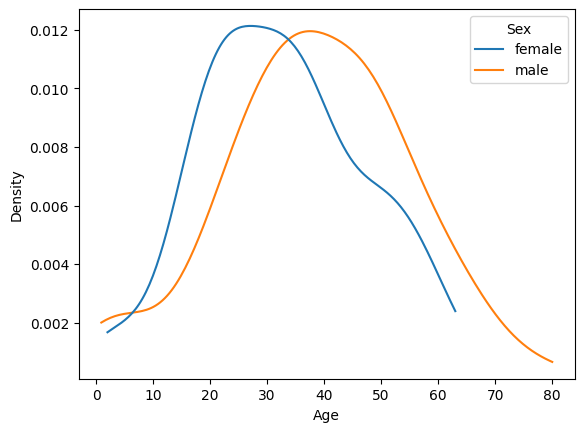

In [18]:
# plot histogram of age between men and women
sns.kdeplot(titanic.dropna(), x='Age', hue='Sex', cut=0)
plt.show()

In [19]:
print(titanic.groupby('Sex')['Age'].agg(['count', 'min', 'mean', 'max']))

        count   min       mean   max
Sex                                 
female    261  0.75  27.915709  63.0
male      453  0.42  30.726645  80.0


In [20]:
# change age to int
titanic['Age'] = titanic['Age'].dropna().astype(int)
print(titanic.groupby('Sex')['Age'].agg(['count', 'min', 'mean', 'max']))

        count  min       mean   max
Sex                                
female    261  0.0  27.904215  63.0
male      453  0.0  30.701987  80.0


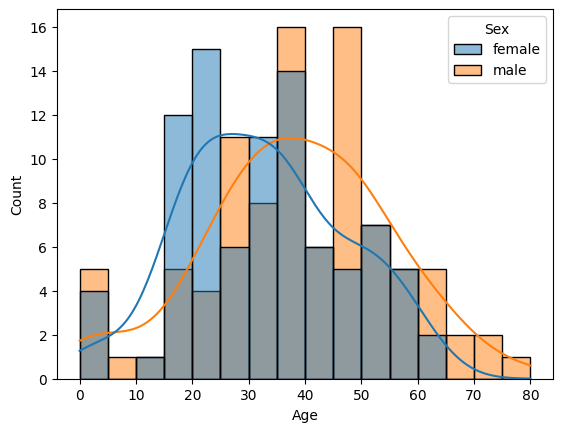

In [21]:
# plot histogram of age between men and women
sns.histplot(titanic.dropna(), x='Age', hue='Sex', kde=True, alpha=0.5, binwidth=5)
plt.show()

## Hypothesis testing

1. Is there a difference in the average age of survivors versus those who died?

In [22]:
# Write the code here

2. Did passenger class affect survival?

In [23]:
# Write the code here

3. Were females more likely to survive than males?

In [24]:
# Write the code here

4. Were children more likely to survive than adults?

In [25]:
# Write the code here

5. Did the city of embarkation affect the survivability?

In [26]:
# Write the code here